## Spring 2025 - ITSC 3162 - Data Mining - Project 1
#### Sydney Johnson
# Los Angeles Arrest Numbers

<hr>

## Introduction

Los Angeles, California is located in southern California and known for being the center of the nation's television and film industry. The beautiful city spands 502 square miles which is the equalivalent of 385,000 football fields. LA has a population of 3.281 million people, which makes it the second most populated city besides New York City, New York. Unfortunately, besides all the glitz and glamour of the city, LA has a high noteable crime rate compared to the rest of the state. In this project, I will covering a data set that contains Los Angele's crime rates from 2020 to the current year. 

I'll be answering the following questions:  
    - How are crime rates spread amoungest the different areas that make up Los Angeles?  
    - What do these crime rates statistics look like based off gender?   
    - Is there an age trend to those involved in these crime statistics?  

My dataset: https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles 
- The features of this dataset includes information on details such as the date of arrest, charges, demographics of the arrested individuals, and the location of incidents.


<hr>

## Pre-Processing

Let's start by getting the data cleaned up.  

- First, I installed the data software I wanted to use and imported it into the notebook. (I put the imports in comments to make it look neater)

In [51]:
#!pip install pandas
#!pip install seaborn
#pip install matplotlib

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Now, lets read the date file and talk through what we're looking at.

In [17]:
arrest_df = pd.read_csv("arrest_data.csv")
arrest_df.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,6636966,BOOKING,07/06/2023 12:00:00 AM,2250.0,8,West LA,817,46,M,B,...,MISDEMEANOR COMPLAINT FILED,900 GAYLEY AV,NaN,34.0637,-118.4482,POINT (-118.4482 34.0637),07/07/2023 12:00:00 AM,143.0,METRO - JAIL DIVISION,4273.0
1,6637119,BOOKING,07/07/2023 12:00:00 AM,1000.0,3,Southwest,396,39,M,B,...,MISDEMEANOR COMPLAINT FILED,40TH PL,VERMONT,34.0100,-118.2915,POINT (-118.2915 34.01),07/07/2023 12:00:00 AM,1156.0,77TH ST,4212.0
2,6624479,BOOKING,06/15/2023 12:00:00 AM,1850.0,7,Wilshire,724,33,F,H,...,MISDEMEANOR COMPLAINT FILED,100 THE GROVE DR,NaN,34.0736,-118.3563,POINT (-118.3563 34.0736),06/15/2023 12:00:00 AM,2251.0,77TH ST,4212.0
3,6636128,BOOKING,07/05/2023 12:00:00 AM,1550.0,2,Rampart,218,30,F,B,...,MISDEMEANOR COMPLAINT FILED,1000 ECHO PARK AV,NaN,34.0741,-118.2590,POINT (-118.259 34.0741),07/05/2023 12:00:00 AM,1940.0,METRO - JAIL DIVISION,4273.0
4,6636650,BOOKING,07/06/2023 12:00:00 AM,1335.0,12,77th Street,1258,31,M,H,...,NaN,7800 S BROADWAY,NaN,33.9689,-118.2783,POINT (-118.2783 33.9689),07/06/2023 12:00:00 AM,1345.0,77TH ST,4212.0


- I want to show all the columns included in this dataset before I remove most of them:

In [19]:
arrest_df.columns

Index(['Report ID', 'Report Type', 'Arrest Date', 'Time', 'Area ID',
       'Area Name', 'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Disposition Description', 'Address',
       'Cross Street', 'LAT', 'LON', 'Location', 'Booking Date',
       'Booking Time', 'Booking Location', 'Booking Location Code'],
      dtype='object')

- For the purpose of this project I only want to use 3 out of the 25 columns given:     
      1. Area Name  
      2. Age  
      3. Sex Code

Let's drop several columns to make the dataset less overwhleming and focus on the key columns we want!
- I use the .drop() command to get rid of several columns to only focus on certain ones
  

In [21]:
arrest_df = arrest_df.drop(['Report ID','Report Type', 'Arrest Date', 'Time', 'Area ID',
       'Reporting District', 'Descent Code','Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Disposition Description', 'Address',
       'Cross Street', 'LAT', 'LON', 'Location', 'Booking Date',
       'Booking Time', 'Booking Location', 'Booking Location Code'], axis = 1)

arrest_df

,Area Name,Age,Sex Code
0,West LA,46,M
1,Southwest,39,M
2,Wilshire,33,F
3,Rampart,30,F
4,77th Street,31,M
...,...,...,...
334572,Central,35,M
334573,Southwest,16,M
334574,N Hollywood,62,M
334575,Van Nuys,27,M


- The new dataset contains three columns with over 334,577 rows. Below I'm going to break apart each column to help analyze the data better.

- Here I'm checking for any null values present and as you can see with columns I've chosen, there aren't any.

In [81]:
arrest_df.isnull().sum()

Area Name    0
Age          0
Sex Code     0
dtype: int64

<hr>

## #1: Area

In this section, we'll look deeper into the different areas that make up Los Angeles and where the least and most arrests have taken place.    
- First, I've sorted the data into a table grouped by the area name.

In [25]:
#The '.groupby('Area Name') groups the data by the area, .size() counts the number of arrests listed in each area,
# .resetIndex(name = 'Arrest Count'), converts the data frame so the 'Arrest Count' column can be made and clearly have the total numbers listed in it
arrest_counts = arrest_df.groupby('Area Name').size().reset_index(name = 'Arrest Count')

#'.sort_values' makes sure the ouput is ordered clearly by area name
arrest_counts = arrest_counts.sort_values('Area Name')

#This line prints/shows the created table
arrest_counts

,Area Name,Arrest Count
0,77th Street,22784
1,Central,26704
2,Devonshire,12197
3,Foothill,11820
4,Harbor,10275
5,Hollenbeck,11252
6,Hollywood,19002
7,Mission,15474
8,N Hollywood,16355
9,Newton,19043


- Above, we Have 20 different areas listed with their corresponding total arrest counts. While this informative, I've made two visuals to better talk about with this data is showing us.

### Bar Graph
- For our first graph in this section, I'm going to use a bar graph. This graph will show the spread of numbers in each area. 

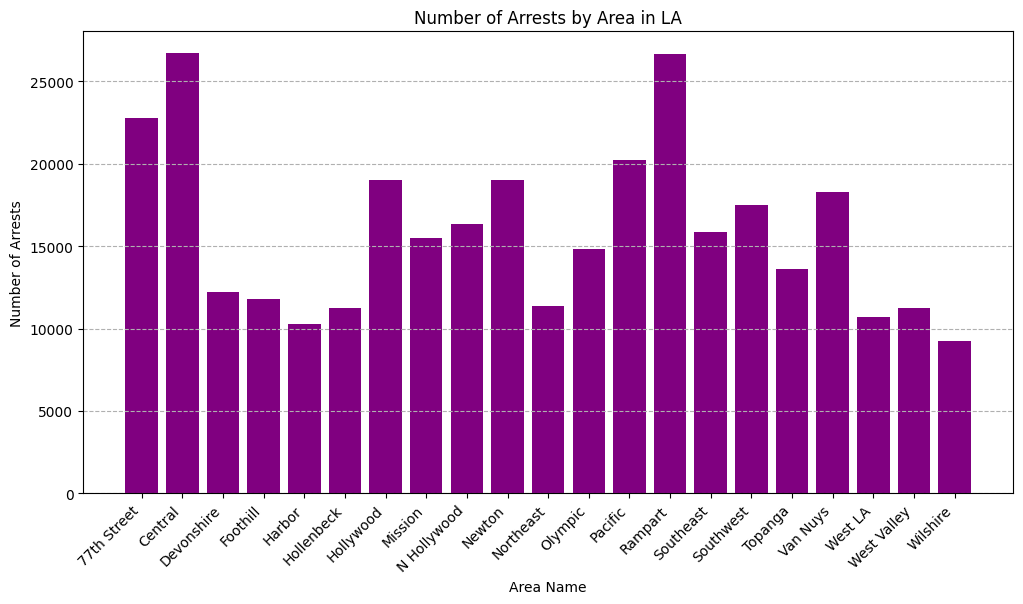

In [42]:
#Using the matplotlib as plt

plt.figure(figsize = (12, 6)) #Sets the size of the graph

#plt.bar(x = area names, y = arrest_counts, and I set the color to purple because I thought it was pretty.
#Decided to use plt rather than sns for this because it gave me better manual control
plt.bar(arrest_counts['Area Name'], arrest_counts['Arrest Count'], color = 'purple')

#Set the axis labels and titles
plt.xlabel("Area Name")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests by Area in LA")
plt.xticks(rotation = 45, ha = "right") #Rotates area names for better readability
#Using .grid() to apply the grid to the y-axis and I wanted the line style to be dashed
plt.grid(axis = 'y', linestyle = '--')


### Heatmap
- Heatmaps are very good with capturing the eye to the different contrasts in a dataset through color density.

Text(120.72222222222221, 0.5, 'Area Name')

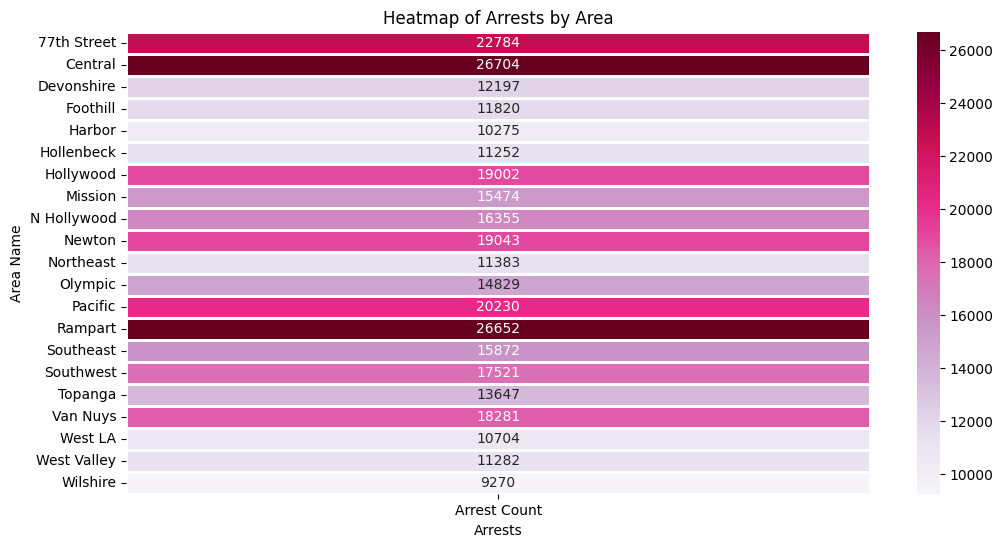

In [51]:
heatmap_data = arrest_counts.set_index('Area Name') #Set the "Area Name" column as the index of the arrest_counts df

plt.figure(figsize = (12,6)) #Set the figure size

# Using sns is better here
# annot = True: displays the values inside of the heatmap
# "PuRd" is the purple color scheme (matches the bar chart theme)
# fmt = d: Format as integers
sns.heatmap(heatmap_data, annot = True, cmap = "PuRd", linewidths = 1, fmt = "d")

plt.title("Heatmap of Arrests by Area") 
plt.xlabel("Arrests")
plt.ylabel("Area Name")

### Area Summary
- With the bar chart and the heatmap, we can identify the top three areas witht the most and least arrest counts:
    - Most:
        1. Central - 26,704 arrests     
        2. Rampart - 26,652 arrests
        3. 77th Street - 22,784 arrests
  
    - Least:
        1. Wilshire - 9,270 arrests
        2. Harbor - 10,275 arrests
        3. West LA - 10,704 arrests

When you are just looking at this data, you only see the number value of arrests in these areas. You don't see the deeper reason for why these areas may contain such high or low numbers. For instance, is there poverty, low or high education, low or high real estate, etc. The limited story that my data is telling are the contrasting arrest numbers for different parts of the city that you may want to keep in mind if you live there or are visiting.  


<hr>

## #2: Age
- In this section, we'll look into the age range of these arrest counts. We will able to see the spread of ages and the total number of arrests for that specfic group.

In [74]:
#By defining bins and labels, we are categorizing the ages into predefined ranges.
bins = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

#The code below create the range column
arrest_df['Age Range'] = pd.cut(arrest_df['Age'], bins=bins, labels=labels)
age_counts = arrest_df.groupby('Age Range').size().reset_index(name = 'Arrest Count')

age_counts

C:\Users\sydne\AppData\Local\Temp\ipykernel_18188\3076759206.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = arrest_df.groupby('Age Range').size().reset_index(name = 'Arrest Count')


,Age Range,Arrest Count
0,0-17,9384
1,18-24,53801
2,25-34,120731
3,35-44,79706
4,45-54,41371
5,55-64,22755
6,65+,6636


Now that we have the table data, let's make two visuals to see our data better.
### Age Bar Graph

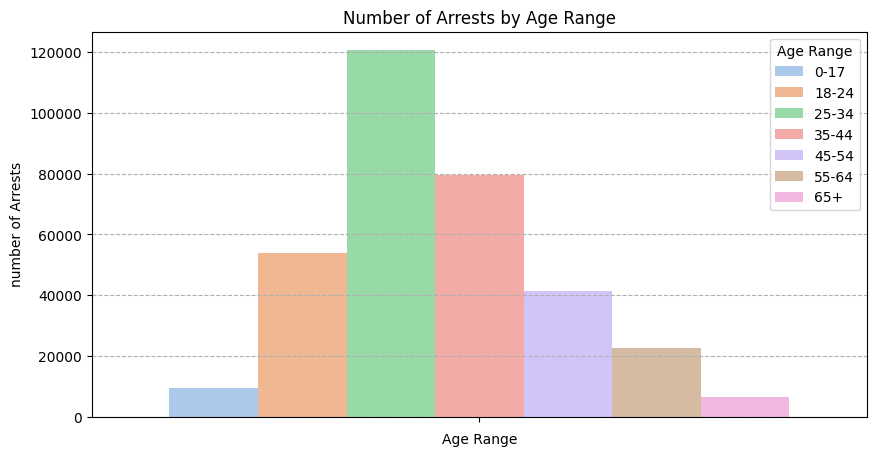

In [77]:
plt.figure(figsize = (10,5)) #Sets the size of the graph
sns.barplot(data = age_counts, hue ='Age Range', y = 'Arrest Count', palette = 'pastel')

plt.xlabel("Age Range")
plt.ylabel("number of Arrests")
plt.title("Number of Arrests by Age Range")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis = 'y', linestyle='--')


### Age Pie Chart

Text(0.5, 1.0, 'Proportion of Arrests by Age Range')

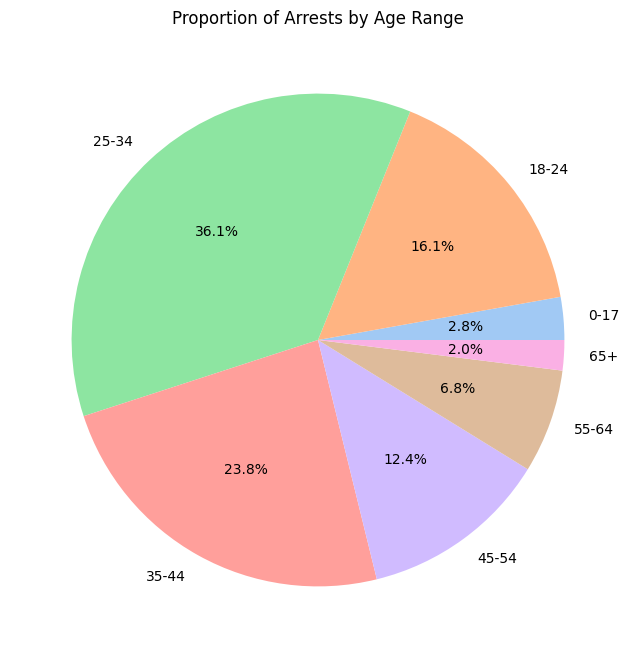

In [84]:
plt.figure(figsize = (8,8))
plt.pie(age_counts['Arrest Count'], labels = age_counts['Age Range'], autopct = '%1.1f%%', colors = sns.color_palette("pastel"))
# 'autopct = '%1.1f%%' sets the percents to one decmial place
plt.title("Proportion of Arrests by Age Range")


### Age Summary
In conclusion, we can see that the age range of '25-34' takes the win with 36.1% of arrests taking place in this category. The age range of '35-44' is next with 23.8% of arrests being in this category. Only 16.1% of arrests for the range '18-24' which surprises me because I though this age range would be the highest. In addition, I find it surpring the there is a 2% in the 65+ category, you would think at that age people would be slowing down. 

<hr>

## #3 Sex Code
In this section, we will be looking at the number of female vs. male arrest numbers. 

In [92]:
sex_counts = arrest_df.groupby('Sex Code').size().reset_index(name = 'Arrest Count')
sex_counts

,Sex Code,Arrest Count
0,F,68196
1,M,266381


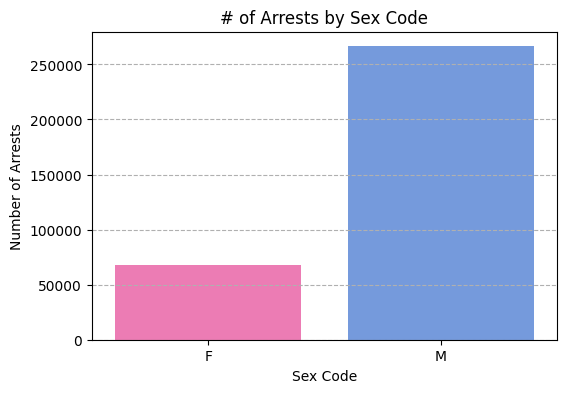

In [96]:
plt.figure(figsize = (6,4)) #Sets the figure size.

#To avoid an error in the color palette, I decided to go ahead and assign them directly. 
color_map = {"M":"#6495ED", "F": "#ff69b4"}
sns.barplot(data=sex_counts, x ='Sex Code', y = 'Arrest Count', hue = 'Sex Code', palette = color_map, legend = False)

plt.xlabel("Sex Code")
plt.ylabel("Number of Arrests")
plt.title("# of Arrests by Sex Code")
plt.grid(axis = 'y', linestyle = '--')


### Sex Code Summary
This portion of the data is pretty self-explanatory. You can see that male arrests are severely higher than female arrests. This doesn't surprise me because this statistic is fairly shared outside the city of Los Angeles.

<hr>

## Impact 
This data provides valuable insight into arrest patterns across Los Angeles, allowing us to analyze variantions based on area, age, and gender. By examining these numbers, we can identify which communities experience higher or lower arrest rates, offering a deeper understanding of crime distribution across the city.   

However, the arrest numbers alone don not tell the full story. Demogrpahics, socioeconomic factors, and policing stratgies all play a role in shaping these statistics. While some areas may have higher arrest rates, understanding the underlying reasons, such as population density or law enforcement presence, wouldadd crucial context to the data.

<hr>

## References


https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles